In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
ham10000 = pd.read_csv('/content/drive/My Drive/UTS/iLab/Dataset/HAM10000_metadata.csv')
ham10000

In [ ]:
# Folder path
ham10000_path = '/content/drive/My Drive/UTS/iLab/images/Melanoma/melanoma_images'

ham10000['image_id'] = ham10000['image_id'] + '.jpg'

# Create column path for images
ham10000['path'] = ham10000['image_id'].apply(lambda x: os.path.join(ham10000_path, x))

# Drop uneccessary columns
ham10000 = ham10000.drop(['lesion_id', 'dx_type'], axis=1)

# Rename columns
ham10000.rename(columns={'image_id': 'image_name', 'dx': 'target'}, inplace=True)

# Reorder
order = ['image_name', 'sex', 'age', 'localization', 'target', 'path'] # Define the new order
ham10000 = ham10000[order]

# Handle column target
ham10000['target'] = ham10000['target'].map(lambda x: 1 if x=='mel' else 0) # Transform the target to binary variables with mel is 1 (melanoma) and the other is 0 (non-melanoma)

# Drop rows with age <=0
ham10000 = ham10000[ham10000['age'] > 0]
print(ham10000)

             image_name     sex   age localization  target  \
0      ISIC_0027419.jpg    male  80.0        scalp       0   
1      ISIC_0025030.jpg    male  80.0        scalp       0   
2      ISIC_0026769.jpg    male  80.0        scalp       0   
3      ISIC_0025661.jpg    male  80.0        scalp       0   
4      ISIC_0031633.jpg    male  75.0          ear       0   
...                 ...     ...   ...          ...     ...   
10010  ISIC_0033084.jpg    male  40.0      abdomen       0   
10011  ISIC_0033550.jpg    male  40.0      abdomen       0   
10012  ISIC_0033536.jpg    male  40.0      abdomen       0   
10013  ISIC_0032854.jpg    male  80.0         face       0   
10014  ISIC_0032258.jpg  female  70.0         back       1   

                                                    path  
0      /content/drive/My Drive/UTS/iLab/images/Melano...  
1      /content/drive/My Drive/UTS/iLab/images/Melano...  
2      /content/drive/My Drive/UTS/iLab/images/Melano...  
3      /content/dri

In [ ]:
ham10000['target'].value_counts()

,count
target,
0,8808
1,1111


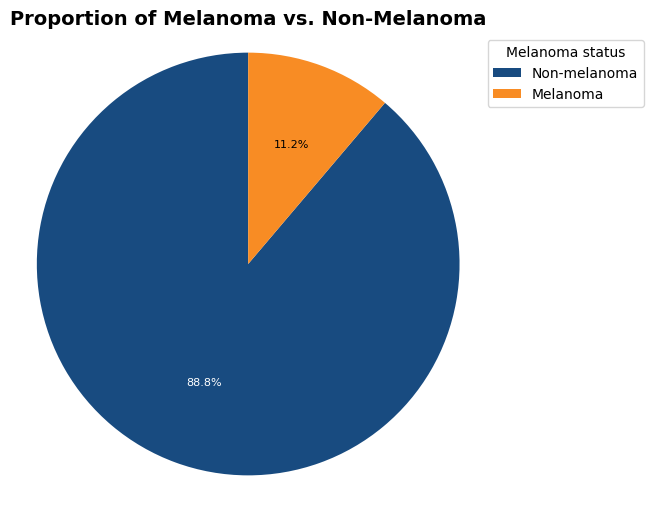

In [ ]:
plt.figure(figsize=(6,6))

#Chart colors
colors = ['#184B80', '#F88C24']

#Count the occurences of each category
counts = ham10000['target'].value_counts()

#Plot bar chart
def autopct_func(pct):
    return f'{pct:.1f}%' if pct > 50 else f'{pct:.1f}%'

# Plot pie chart with custom text color for the percentages
patches, texts, autotexts = plt.pie(counts, colors=colors,
                                    autopct=autopct_func,
                                    startangle=90, textprops={'color':'black'})
autotexts[0].set_color('white')
autotexts[1].set_color('black')

for autotext in autotexts:
    autotext.set_fontsize(8)

#Add labels and title
plt.title('Proportion of Melanoma vs. Non-Melanoma', fontsize=14, weight='bold')
plt.axis('equal')
plt.legend(['Non-melanoma', 'Melanoma'], title='Melanoma status', loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
ham10000.duplicated().sum()

0

In [ ]:
# Check if any row has all null values
ham10000[ham10000.isnull().all(axis=1)]

,image_name,sex,age,localization,target,path


In [ ]:
# Check dimensions after dropping duplicates
ham10000.shape

(9919, 6)

In [ ]:
# Get the overview of dataset
ham10000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9919 entries, 0 to 10014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_name    9919 non-null   object 
 1   sex           9919 non-null   object 
 2   age           9919 non-null   float64
 3   localization  9919 non-null   object 
 4   target        9919 non-null   int64  
 5   path          9919 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 542.4+ KB


In [ ]:
ham10000.describe()

,age,target
count,9919.000000,9919.000000
mean,52.067749,0.112007
std,16.686741,0.315391
min,5.000000,0.000000
25%,40.000000,0.000000
50%,50.000000,0.000000
75%,65.000000,0.000000
max,85.000000,1.000000


In [ ]:
ham10000['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

## Exploratory Data Analysis

<ipython-input-21-bd5b850c2220>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = count.index, y=count.values, palette='Blues_r')


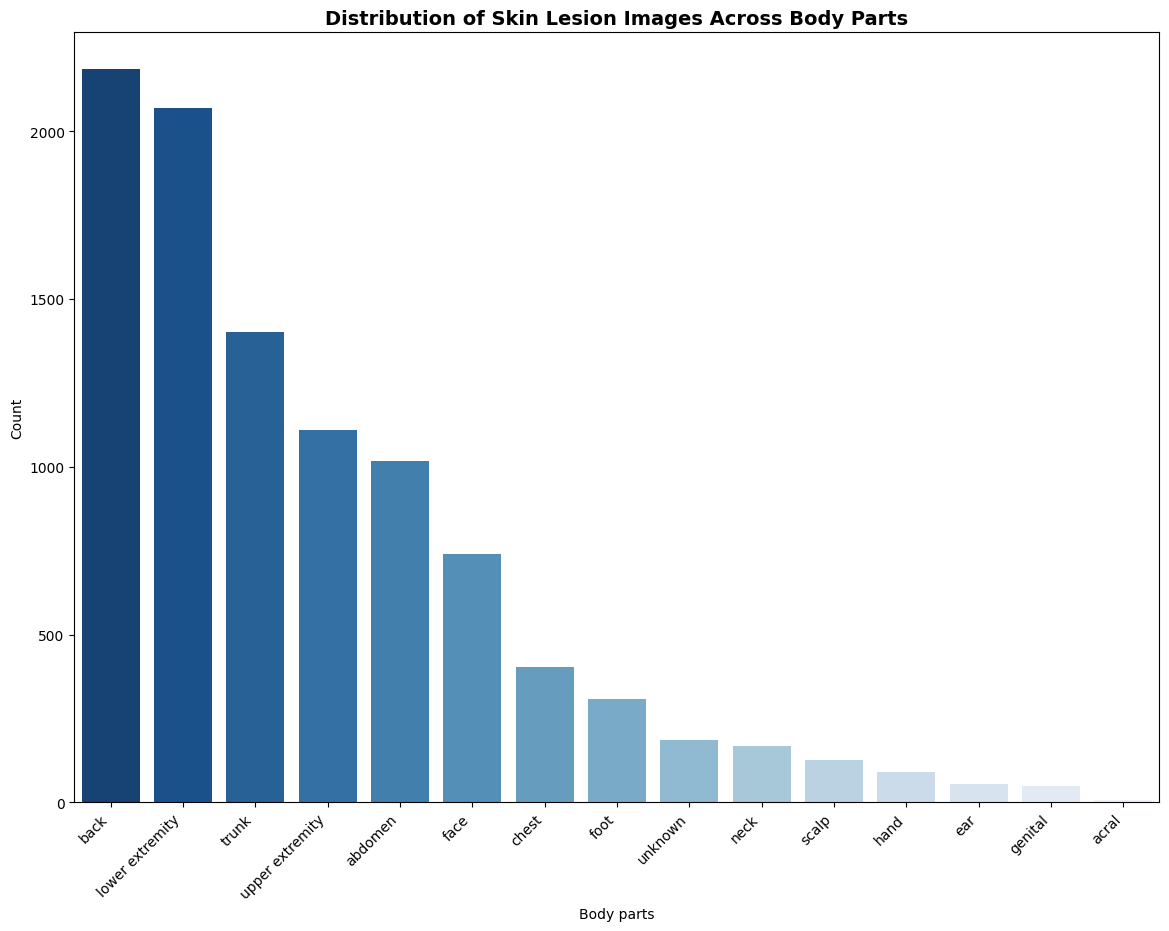

In [ ]:
# Count
count = ham10000['localization'].value_counts()

# Set the figure size
plt.figure(figsize=(14,10))

# Visualisation
sns.barplot(x = count.index, y=count.values, palette='Blues_r')
plt.title('Distribution of Skin Lesion Images Across Body Parts', fontsize=14, weight='bold')
plt.xlabel('Body parts')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-22-52bfc7d92035>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=malenoma_proportion_by_bodyparts.index, y=malenoma_proportion_by_bodyparts.values, palette="Reds_r")


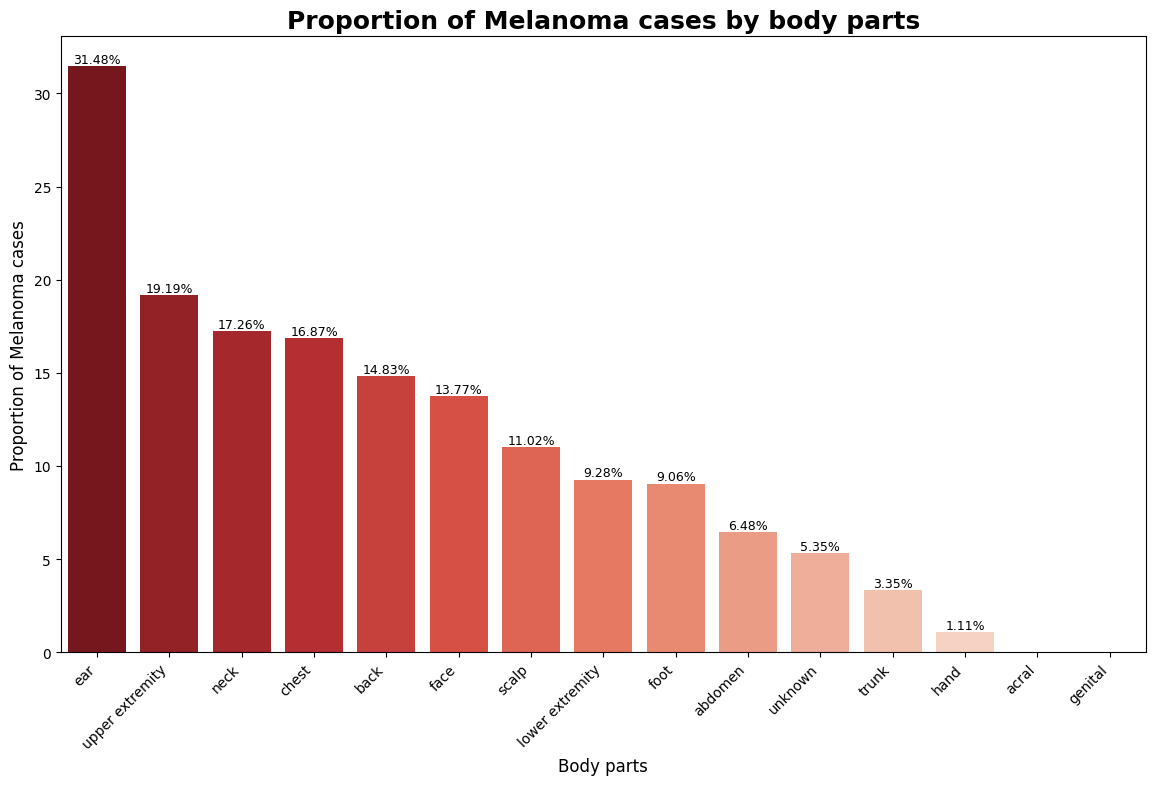

In [ ]:
melanoma = ham10000[ham10000['target'] == 1]

# Count the number of images by body parts
count = ham10000['localization'].value_counts()

# Count the number of melanoma pictures by body parts
melanoma_count = melanoma['localization'].value_counts()

# Calculate proportion
malenoma_proportion_by_bodyparts = ((melanoma_count/count) * 100).sort_values(ascending=False)

# Visualise
plt.figure(figsize=(14,8))
sns.barplot(x=malenoma_proportion_by_bodyparts.index, y=malenoma_proportion_by_bodyparts.values, palette="Reds_r")
plt.xlabel('Body parts', fontsize=12)
plt.ylabel('Proportion of Melanoma cases', fontsize=12)
plt.title('Proportion of Melanoma cases by body parts', fontsize=18, weight='bold')
plt.xticks(rotation=45, ha='right')

y = malenoma_proportion_by_bodyparts.values
for index, value in enumerate(y):
  plt.text(index, value, str(round(value, 2)) + '%', ha='center', va='bottom', fontsize=9)
plt.show()

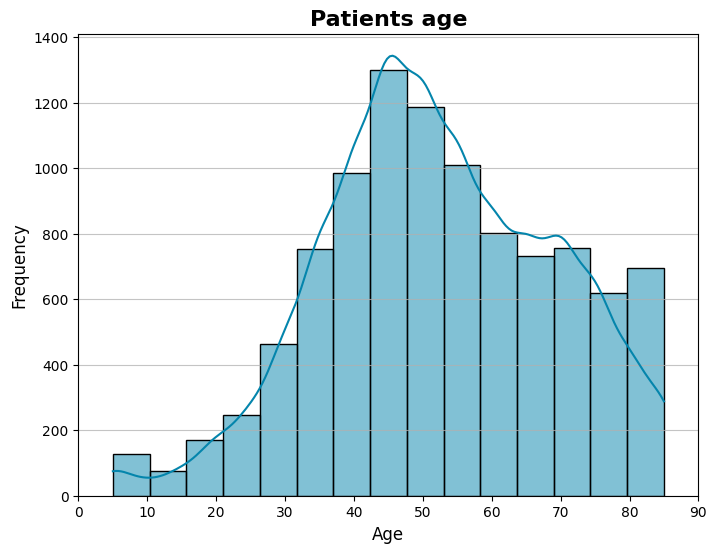

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(ham10000['age'], bins=15,kde=True, color = '#0485AC')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Patients age', fontsize=16, weight='bold')
plt.xticks(np.arange(0, ham10000['age'].max()+10, 10))
plt.grid(axis='y', alpha=0.75)
plt.show()

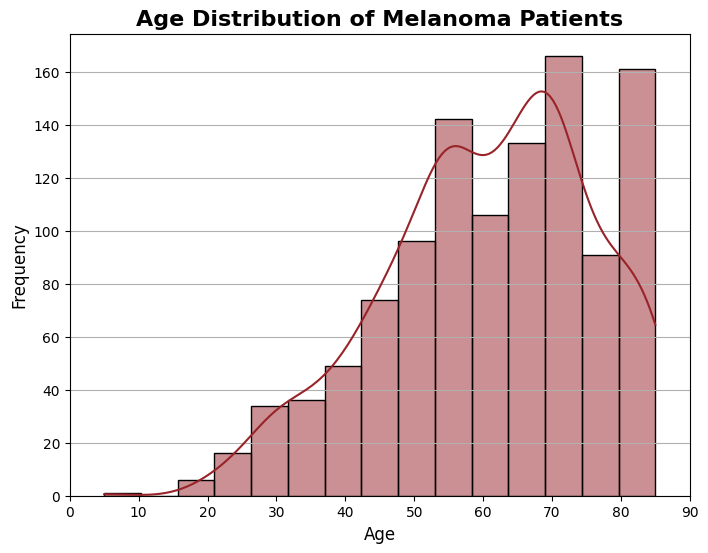

In [ ]:
melanoma = ham10000[ham10000['target'] == 1]

plt.figure(figsize=(8, 6))
sns.histplot(melanoma['age'], bins=15,kde=True, color = '#982329')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution of Melanoma Patients', fontsize=16, weight='bold')
plt.xticks(np.arange(0, melanoma['age'].max()+10, 10))
plt.grid(axis='y')

plt.show()

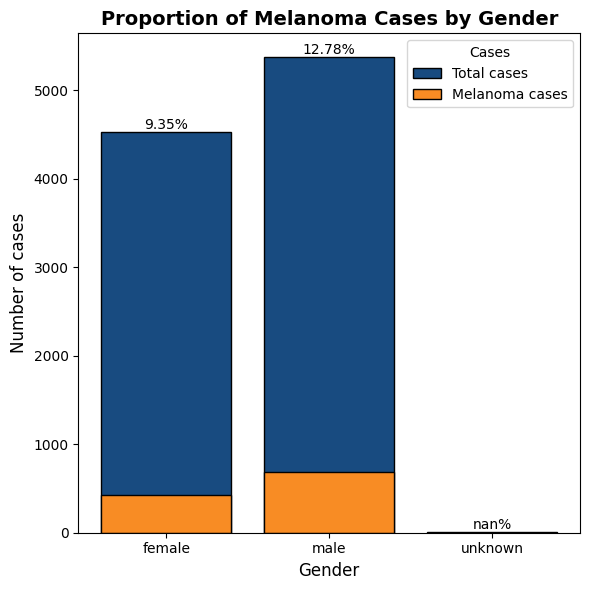

In [ ]:
melanoma = ham10000[ham10000['target'] == 1]

# Count the number of cases by gender
count = ham10000['sex'].value_counts()

# Count the number of Melanoma cases by gender
melanoma_count = melanoma['sex'].value_counts()

# Calculate proportion of melanoma cases by gender
proportion_by_gender = (melanoma_count/count) * 100

# Prepare data
proportions = pd.DataFrame({
    'Melanoma cases': melanoma_count,
    'Total cases': count,
    'Proportion by gender': proportion_by_gender})

fig, ax = plt.subplots(figsize=(6, 6))
bar1 = ax.bar(proportions.index, proportions['Total cases'], color='#184B80', edgecolor='black')
bar2 = ax.bar(proportions.index, proportions['Melanoma cases'], color='#F88C24', edgecolor='black')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Number of cases', fontsize=12)
ax.set_title('Proportion of Melanoma Cases by Gender', fontsize=14, weight='bold')
plt.legend(title='Cases', loc='upper right')

# Add proportion labels to bars
for index, row in proportions.iterrows():
    ax.text(index, row['Total cases'], f"{row['Proportion by gender']:.2f}%",
            ha='center', va='bottom', fontsize=10, color='black')

# Add legend
ax.legend(['Total cases', 'Melanoma cases'], title='Cases', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()